# Importing the libraries.
# Read your data from CSV to a data frame.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
dataset=pd.read_csv(r"C:\Users\pc\Downloads\Recruitment_Data.csv")

# Understanding the dataset which imported properly.

# using head(),tail(),shape,describe and lastly info().

In [3]:
dataset.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online


In [4]:
dataset.tail()

,attrition,performance_rating,sales_quota_pct,recruiting_source
441,0,3,1.627813,Campus
442,1,4,0.689682,Referral
443,0,4,1.196198,NaN
444,0,4,1.598213,Applied Online
445,0,2,0.582642,NaN


In [5]:
dataset.shape

(446, 4)

In [6]:
dataset.describe

<bound method NDFrame.describe of      attrition  performance_rating  sales_quota_pct recruiting_source
0            1                   3         1.088190    Applied Online
1            0                   3         2.394173               NaN
2            1                   2         0.497530            Campus
3            0                   2         2.513958               NaN
4            0                   3         1.424789    Applied Online
..         ...                 ...              ...               ...
441          0                   3         1.627813            Campus
442          1                   4         0.689682          Referral
443          0                   4         1.196198               NaN
444          0                   4         1.598213    Applied Online
445          0                   2         0.582642               NaN

[446 rows x 4 columns]>

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attrition           446 non-null    int64  
 1   performance_rating  446 non-null    int64  
 2   sales_quota_pct     446 non-null    float64
 3   recruiting_source   241 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 14.1+ KB


# info() gives us the detail information about the dataset, which all are non-null and the data types are integer, float and string.

# step 1 : DATA CLEANING check if there are any null values. 



# adding a new category in the recruiting_soutce column to replace the null values.

# data handling 

In [8]:
new_dataset = dataset.fillna('Walk-in interview')
print(new_dataset)

     attrition  performance_rating  sales_quota_pct  recruiting_source
0            1                   3         1.088190     Applied Online
1            0                   3         2.394173  Walk-in interview
2            1                   2         0.497530             Campus
3            0                   2         2.513958  Walk-in interview
4            0                   3         1.424789     Applied Online
..         ...                 ...              ...                ...
441          0                   3         1.627813             Campus
442          1                   4         0.689682           Referral
443          0                   4         1.196198  Walk-in interview
444          0                   4         1.598213     Applied Online
445          0                   2         0.582642  Walk-in interview

[446 rows x 4 columns]


# UNIVARITE ANALYSIS

<Axes: xlabel='attrition', ylabel='count'>

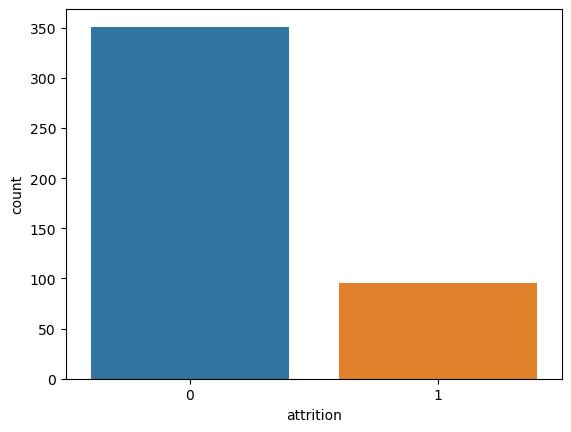

In [9]:
sns.countplot(x = 'attrition' , data=new_dataset)

<Axes: xlabel='sales_quota_pct', ylabel='Count'>

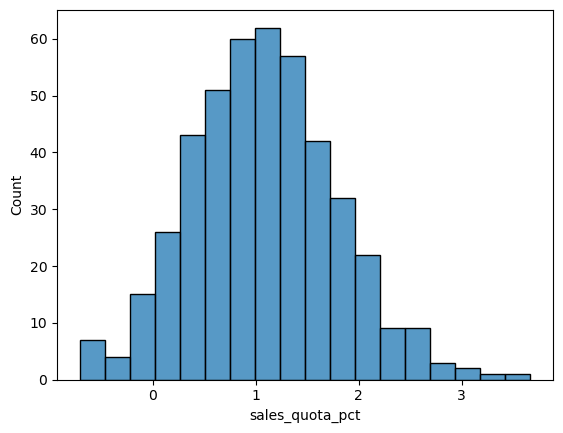

In [10]:
sns.histplot(new_dataset['sales_quota_pct'])

# BIVARIATE ANALYSIS
# let's check the relationship for performance_rating and sales_quota_pct.(Numerical vs numerical)

<Axes: xlabel='sales_quota_pct', ylabel='performance_rating'>

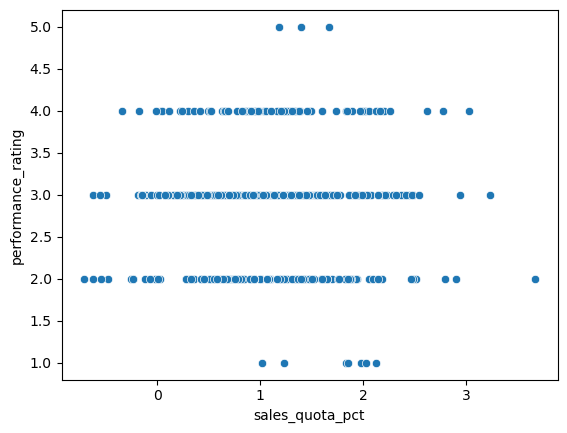

In [11]:
sns.scatterplot(x=new_dataset['sales_quota_pct'], y=new_dataset['performance_rating'])

# Numerical vs categorical

<Axes: xlabel='performance_rating', ylabel='recruiting_source'>

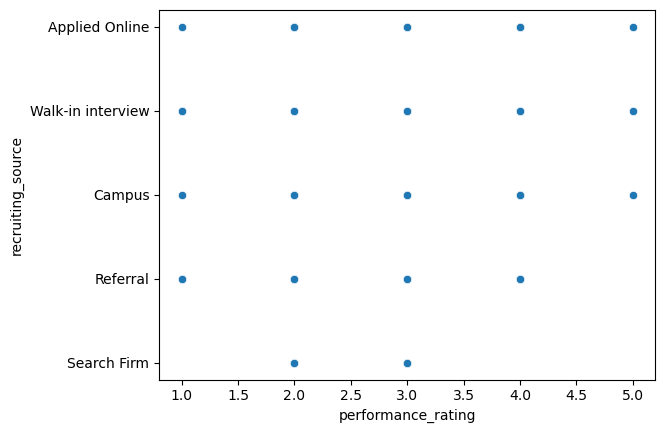

In [12]:
sns.scatterplot(x=new_dataset['performance_rating'], y=new_dataset['recruiting_source'])

# Task Identify groups in the dataset
# grouping the data using GroupBy functions

In [13]:
new_dataset.groupby("attrition")

# this below code will calculate the mean of all the numerical columns that are in the dataset.

In [14]:
new_dataset.groupby("attrition").mean()

,performance_rating,sales_quota_pct
attrition,,
0,2.903134,1.099018
1,2.863158,1.021973


In [15]:
var=new_dataset.groupby('recruiting_source')['sales_quota_pct']

In [16]:
print(var)

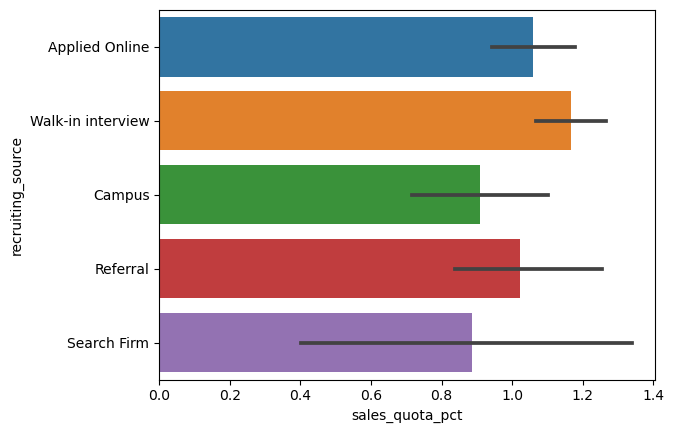

In [28]:
sns.barplot(x ='sales_quota_pct',y ='recruiting_source',data = new_dataset)
plt.show()

# Print out the average Sales Number grouped by Recruiting Source

In [18]:
var=new_dataset.groupby('recruiting_source')['sales_quota_pct'].mean()

In [19]:
print(var)

recruiting_source
Applied Online       1.058590
Campus               0.908035
Referral             1.023198
Search Firm          0.886960
Walk-in interview    1.168109
Name: sales_quota_pct, dtype: float64


# Print out the average Attrition Number grouped by Recruiting Source

In [20]:
var2=new_dataset.groupby('recruiting_source')['attrition'].mean()

In [21]:
print(var2)

recruiting_source
Applied Online       0.246154
Campus               0.285714
Referral             0.333333
Search Firm          0.500000
Walk-in interview    0.131707
Name: attrition, dtype: float64


# Take a look at these numbers to get an idea about how each Source is performing on these numbers - Keep in mind that we are
# looking for sources that have high Sales numbers and low Attrition numbers.

In [22]:
performance_dataset= pd.merge(var,var2, on='recruiting_source')

In [23]:
performance_dataset=performance_dataset.sort_values(by=['sales_quota_pct','attrition'], ascending=[False,True])

print(performance_dataset)

                   sales_quota_pct  attrition
recruiting_source                            
Walk-in interview         1.168109   0.131707
Applied Online            1.058590   0.246154
Referral                  1.023198   0.333333
Campus                    0.908035   0.285714
Search Firm               0.886960   0.500000


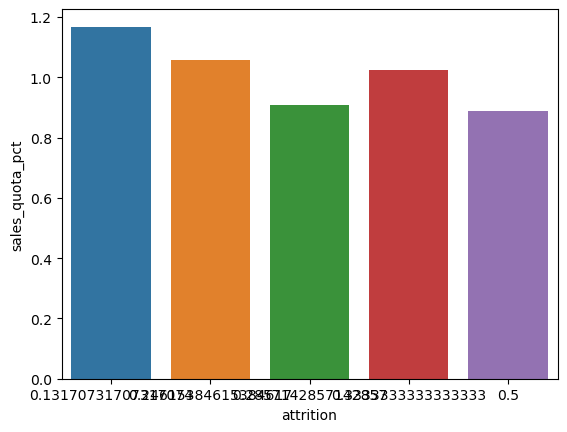

In [27]:
sns.barplot(x = 'attrition',y = 'sales_quota_pct',data = performance_dataset)
plt.show()